***Квадратичная функция***

                      Методы второго порядка
Дано:
Целевая функция:        f(x, y) =  6*x**2 - 4*x*y + 8.94427190999916*x + 3*y**2 + 17.8885438199983*y + 22
Начальное приближение:  X =  [ 2 -2]
Точность вычисления:    Eps =  0.001

**********************************************************************************************************************************************************************
Методы			        ДФП			      БФШ			    Пауэлла
Xmin  	 [-2.23606795 -4.47213587] 	 [-2.23606799 -4.47213598] 	 [-2.23606799 -4.47213598]
f(Xmin)			 -28.0 			 -28.00000000000002 		 -28.000000000000007
i			 2 					 2 					 2
n			 105 					 105 					 105
g			 3 					 3 					 3
**********************************************************************************************************************************************************************


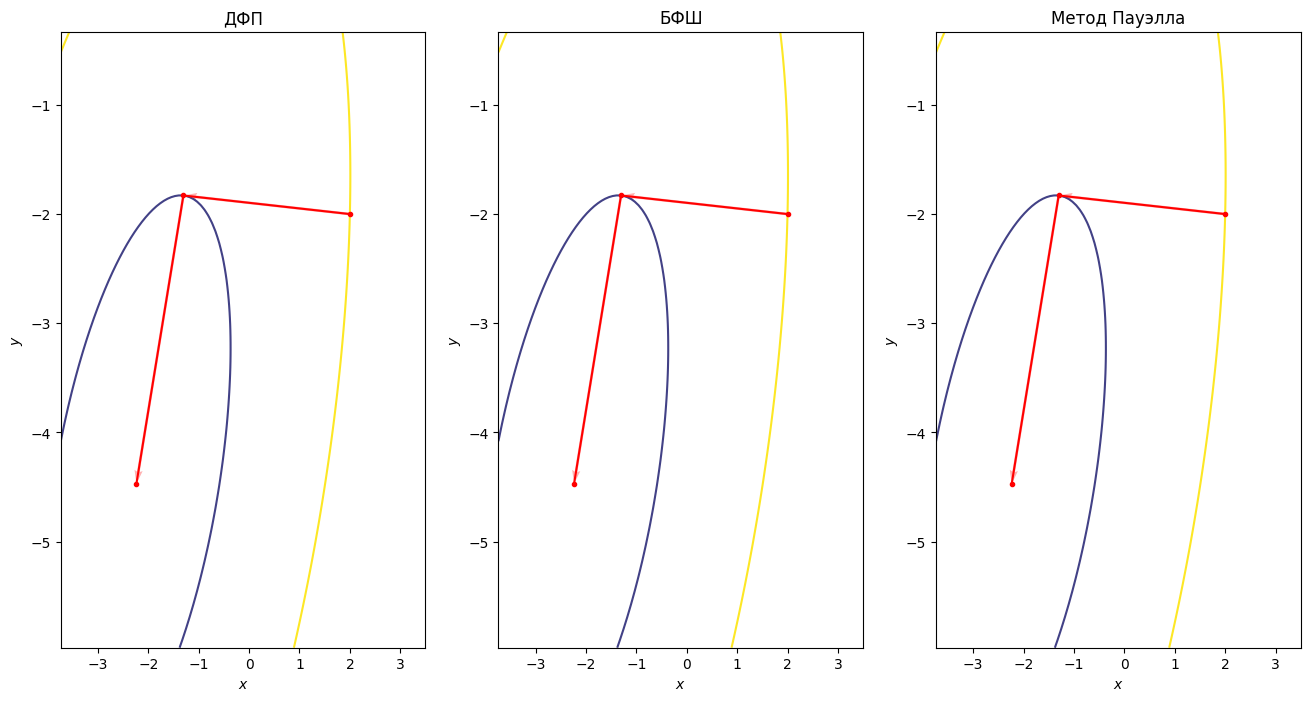

In [7]:
from ast import While
from cmath import sqrt
from turtle import width
from matplotlib.colors import LinearSegmentedColormap
from sympy.tensor.array import derive_by_array
from scipy import optimize
from operator import mod
import numpy as np
import sympy as sp
import math

import matplotlib.pyplot as plt


# Параметры методов:
eps = 0.001
X0 = np.array([2, -2])

# Функции
def f1(x, y): return 10*x**2-4*x*y+7*y**2-4*5**(1/2)*(5*x-y)-16
def f2(x, y): return 6*x**2-4*x*y+3*y**2+4*5**(1/2)*(x+2*y)+22
f = f2

# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
Grad_f = derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')

# Вычисление гессиана
Hessian_f = derive_by_array(derive_by_array(
    f(x_sym, y_sym), [x_sym, y_sym]), [x_sym, y_sym])
Hessian_f = sp.lambdify((x_sym, y_sym), Hessian_f, 'numpy')

#Метод Давидона - Флетчера - Пауэлла
def DFP():
    def w(X): return -np.array(Grad_f(X[0], X[1]))
    def fun(X): return f(X[0], X[1])
    A_p, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)

    X = X0
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    p = w(X)
    g = 1
    n = i = 0
    A = np.eye(2)
    A_p = np.append(A_p, A)

    while np.linalg.norm(w(X)) > eps:
        # минимизируем функцию
        def phi(kappa): return fun(X + kappa * p)
        kappa, arg, k = optimize.golden(phi,brack=(0,10), full_output=True)
        n += k
        
        # находим точку
        Xk = X + kappa * p
        X_p = np.append(X_p, Xk[0])
        Y_p = np.append(Y_p, Xk[1])

        deltaWk = w(Xk) - w(X)
        deltaXk = Xk - X
        i += 1
        g += 1
        if i % 2 == 0:
            A = np.eye(2)
        else:
            ro = np.dot(np.dot(A, deltaWk), deltaWk)
            part1 = np.outer(deltaXk, deltaXk) / \
                np.dot(deltaWk, deltaXk)
            part2 = np.dot(np.outer(np.dot(A, deltaWk), np.transpose(deltaWk)),
                           np.transpose(A)) / ro
            A = A - part1 - part2
        X = Xk
        p = np.dot(A, w(X))
        A_p = np.append(A_p, A)
    return X, X_p, Y_p, A_p, i, n, g

#Метод Бройдена - Флетчера - Шенно
def BFSH():
    def w(X): return -np.array(Grad_f(X[0], X[1]))
    def fun(X): return f(X[0], X[1])
    A_p, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)

    X = X0
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    p = w(X)
    g = 1
    n = i = 0
    A = np.eye(2)
    A_p = np.append(A_p, A)

    while np.linalg.norm(w(X)) > eps:
        # минимизируем функцию
        def phi(kappa): return fun(X + kappa * p)
        kappa, arg, k = optimize.golden(phi,brack=(0,10), full_output=True)
        n += k
        
        # находим точку
        Xk = X + kappa * p
        X_p = np.append(X_p, Xk[0])
        Y_p = np.append(Y_p, Xk[1])

        deltaWk = w(Xk) - w(X)
        deltaXk = Xk - X
        i += 1
        g += 1
        if i % 2 == 0:
            A = np.eye(2)
        else:
            ro = np.dot(np.dot(A, deltaWk), deltaWk)
            r = np.dot(A, deltaWk) / ro - deltaXk / np.dot(deltaXk, deltaWk)
            part1 = np.outer(deltaXk, deltaXk) / \
                np.dot(deltaWk, deltaXk)
            part2 = np.dot(np.outer(np.dot(A, deltaWk), np.transpose(deltaWk)),
                           np.transpose(A)) / ro
            part3 = ro * np.outer(r, np.transpose(r))
            A = A - part1 - part2 + part3
        X = Xk
        p = np.dot(A, w(X))
        A_p = np.append(A_p, A)
    return X, X_p, Y_p, A_p, i, n, g

#Метод Пауэлла
def Powel():
    def w(X): return -np.array(Grad_f(X[0], X[1]))
    def fun(X): return f(X[0], X[1])
    A_p, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)

    X = X0
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    p = w(X)
    g = 1
    n = i = 0
    A = np.eye(2)
    A_p = np.append(A_p, A)

    while np.linalg.norm(w(X)) > eps:
        # минимизируем функцию
        def phi(kappa): return fun(X + kappa * p)
        kappa, arg, k = optimize.golden(phi,brack=(0,10), full_output=True)
        n += k
        
        # находим точку
        Xk = X + kappa * p
        X_p = np.append(X_p, Xk[0])
        Y_p = np.append(Y_p, Xk[1])

        deltaWk = w(Xk) - w(X)
        deltaXk = Xk - X
        deltaXk_wave = deltaXk + np.dot(A, deltaWk)
        i += 1
        g += 1
        if i % 2 == 0:
            A = np.eye(2)
        else:
            q = np.outer(deltaXk_wave, np.transpose(deltaXk_wave)) / \
            np.dot(deltaWk, deltaXk_wave)
            A = A - q
        X = Xk
        p = np.dot(A, w(X))
        A_p = np.append(A_p, A)
    return X, X_p, Y_p, A_p, i, n, g
    

# 3D и линии уровня двух графиков
def DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize=(16, 8 ))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    fig.canvas.manager.set_window_title('Квазиньютоновские методы')


    
    # Angles needed for quiver plot
    anglesx2 = X2_p[1:] - X2_p[:-1]
    anglesy2 = Y2_p[1:] - Y2_p[:-1]
    delta = 1.5
    X = np.linspace(np.min(X2_p) - delta, np.max(X2_p) + delta,  100)
    Y = np.linspace(np.min(Y2_p) - delta, np.max(Y2_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels=Val(X2_p, Y2_p))
    axes1.quiver(X2_p[:-1], Y2_p[:-1], anglesx2, anglesy2,
              scale_units='xy', angles='xy', scale=1, color='r', alpha=.3)
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('ДФП')


 # Angles needed for quiver plot
    anglesx3 = X3_p[1:] - X3_p[:-1]
    anglesy3 = Y3_p[1:] - Y3_p[:-1]
    delta = 1.5
    X = np.linspace(np.min(X3_p) - delta, np.max(X3_p) + delta,  100)
    Y = np.linspace(np.min(Y3_p) - delta, np.max(Y3_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels=Val(X3_p, Y3_p))
    axes2.quiver(X3_p[:-1], Y3_p[:-1], anglesx3, anglesy3,
              scale_units='xy', angles='xy', scale=1, color='r', alpha=.3)
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('БФШ')


# Angles needed for quiver plot
    anglesx4 = X4_p[1:] - X4_p[:-1]
    anglesy4 = Y4_p[1:] - Y4_p[:-1]
    delta = 1.5
    X = np.linspace(np.min(X4_p) - delta, np.max(X4_p) + delta,  100)
    Y = np.linspace(np.min(Y4_p) - delta, np.max(Y4_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels=Val(X4_p, Y4_p))
    axes3.quiver(X4_p[:-1], Y4_p[:-1], anglesx4, anglesy4,
              scale_units='xy', angles='xy', scale=1, color='r', alpha=.3)
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Пауэлла')


# 3D и линии уровня одного графика
def Draw(X_, X_p, Y_p, k):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1]))
    X = np.linspace(np.min(X_p) - delta, np.max(X_p) + delta,  100)
    Y = np.linspace(np.min(Y_p) - delta, np.max(Y_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)


    # Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize=(16, 8))

    # Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=5, cstride=5,
                    cmap='jet', alpha=.4, edgecolor='none')
    ax.plot(X_p, Y_p, f(X_p, Y_p), color='r', marker='*', alpha=.4)

    # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*',
               c='red', label='X0 - начальное приближение')
    ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*',
               c='black', label='X - точка минимума')
    ax.legend(shadow=True, fontsize=8)
    ax.view_init(15, 60)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title('Поверхность данной функции')


    
    delta = 1.5
    X = np.linspace(np.min(X_p) - delta, np.max(X_p) + delta,  100)
    Y = np.linspace(np.min(Y_p) - delta, np.max(Y_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    # Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X, Y, Z, levels=Val(X_p, Y_p), cmap='jet')

    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color='r', marker='*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy,
              scale_units='xy', angles='xy', scale=1., color='r', alpha=.3)
    if k == 1:
        fig.canvas.manager.set_window_title('Давидона - Флетчера - Пауэлла')
        ax.set_title('Давидона - Флетчера - Пауэлла')
    elif k == 2:
        fig.canvas.manager.set_window_title('Бройдена - Флетчера - Шенно')
        ax.set_title('Бройдена - Флетчера - Шенно')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Пауэлла')
        ax.set_title('Метод Пауэлла')

# Таблица точек и значений
def DrawPoints(X_p, Y_p):
    for x in range(len(X_p)):
        print('X = [', '%.6f' % X_p[x], ' ', '%.6f' %
              Y_p[x], ']', '\tf = ', '%.6f' % f(X_p[x], Y_p[x]))

def DrawA(A_p):
    x = 0
    while x < len(A_p):
        print(A_p[x], ' ', A_p[x + 1])
        print(A_p[x + 2], ' ', A_p[x + 3])
        x += 4
    print()

# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i], Y_p[i]))
    return np.sort(Value)


##############################################################################################################################################################################
##############################################################################################################################################################################
##############################################################################################################################################################################


print(" " * 20, ' Методы второго порядка')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)

# X1, X1_p, Y1_p, A1_p, i1, n1, g1 = DFP()
# print('Точка минимума: ', X1)
# print('Минимум: ', f(X1[0], X1[1]))
# print('Количество итераций: ', i1)
# print('Количество вызовов: ', n1)
# DrawPoints(X1_p, Y1_p)
# Draw(X1, X1_p, Y1_p, 1)


# X2, X2_p, Y2_p, A2_p, i2, n2, g2 = BFSH()
# print('Точка минимума: ', X2)
# print('Минимум: ', f(X2[0], X2[1]))
# print('Количество итераций: ', i2)
# print('Количество вызовов: ', n2)
# Draw(X2, X2_p, Y2_p, 2)


# X3, X3_p, Y3_p, A3_p, i3, n3, g3 = Powel()
# print('Точка минимума: ', X3)
# print('Минимум: ', f(X3[0], X3[1]))
# print('Количество итераций: ', i3)
# print('Количество вызовов: ', n3)
# Draw(X3, X3_p, Y3_p, 3)




X1, X1_p, Y1_p, A1_p, i1, n1, g1 = DFP()
X2, X2_p, Y2_p, A2_p, i2, n2, g2 = BFSH()
X3, X3_p, Y3_p, A3_p, i3, n3, g3 = Powel()
# DrawPoints(X1_p, Y1_p)
# DrawPoints(X2_p, Y2_p)
# DrawPoints(X3_p, Y3_p)
print()
print('**********************************************************************************************************************************************************************')
print('Методы\t\t\t', '       ДФП\t\t\t', '     БФШ\t\t\t', '   Пауэлла')
print('Xmin  \t',  X1, '\t', X2, '\t', X3)
print('f(Xmin)\t\t\t', f(X1[0], X1[1]), '\t\t\t',
      f(X2[0], X2[1]), '\t\t', f(X3[0], X3[1]))
print('i\t\t\t', i1, '\t\t\t\t\t', i2, '\t\t\t\t\t', i3)
print('n\t\t\t', n1, '\t\t\t\t\t', n2, '\t\t\t\t\t', n3)
print('g\t\t\t', g1, '\t\t\t\t\t', g2, '\t\t\t\t\t', g3)

print('**********************************************************************************************************************************************************************')
DrawSurfContour(X1, X2, X3, X1_p, Y1_p, X2_p, Y2_p, X3_p, Y3_p)


plt.show()


***Розенброк***

                      Методы второго порядка
Дано:
Целевая функция:        f(x, y) =  (x - 1)**2 + 200*(x**2 - y)**2
Начальное приближение:  X =  [-2  2]
Точность вычисления:    Eps =  1e-06
Точка минимума:  [1.         1.00000001]
Минимум:  1.3236132871345326e-17
Количество итераций:  25
Количество вызовов:  1307
Количество градиентов:  26
Точка минимума:  [1.         1.00000001]
Минимум:  1.33817986830302e-17
Количество итераций:  25
Количество вызовов:  1309
Точка минимума:  [1.         1.00000001]
Минимум:  1.31727175495506e-17
Количество итераций:  25
Количество вызовов:  1307

**********************************************************************************************************************************************************************
Методы			        ДФП			      БФШ			    Пауэлла
Xmin  		 [1.         1.00000001] 		 [1.         1.00000001] 	 [1.         1.00000001]
f(Xmin)			 1.3236132871345326e-17 			 1.33817986830302e-17 		 1.31727175495506e-17
i			 25 					 25 					 25
n

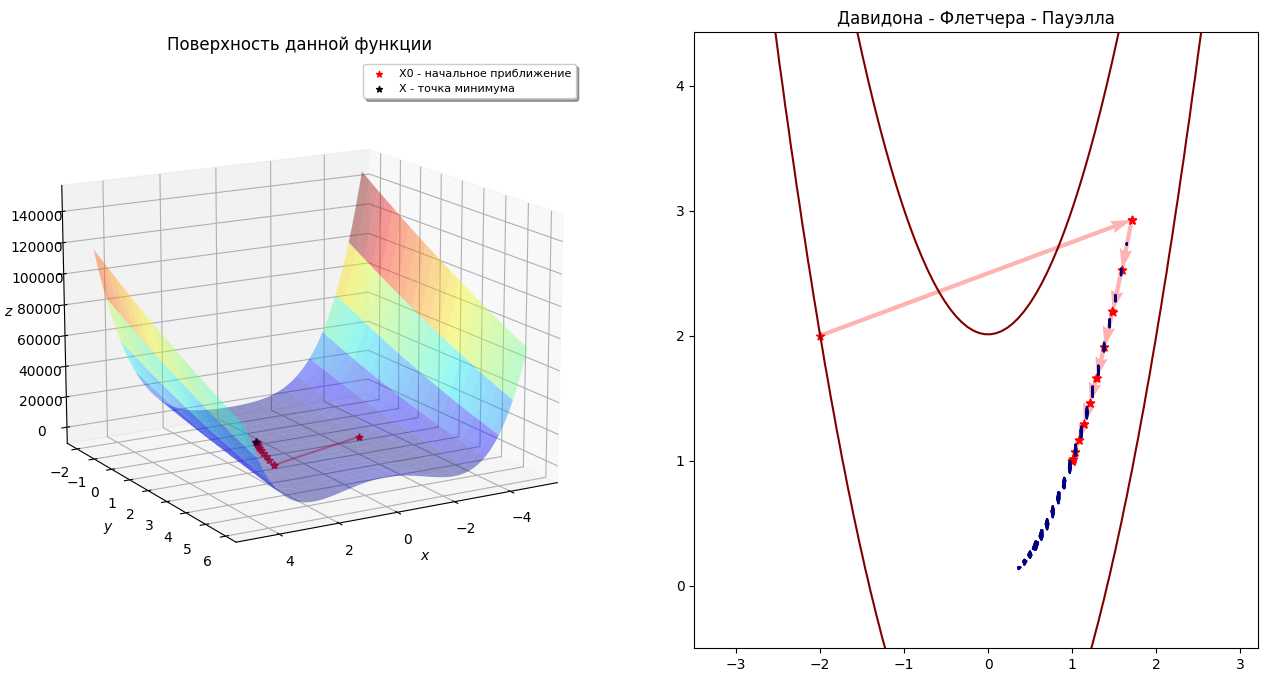

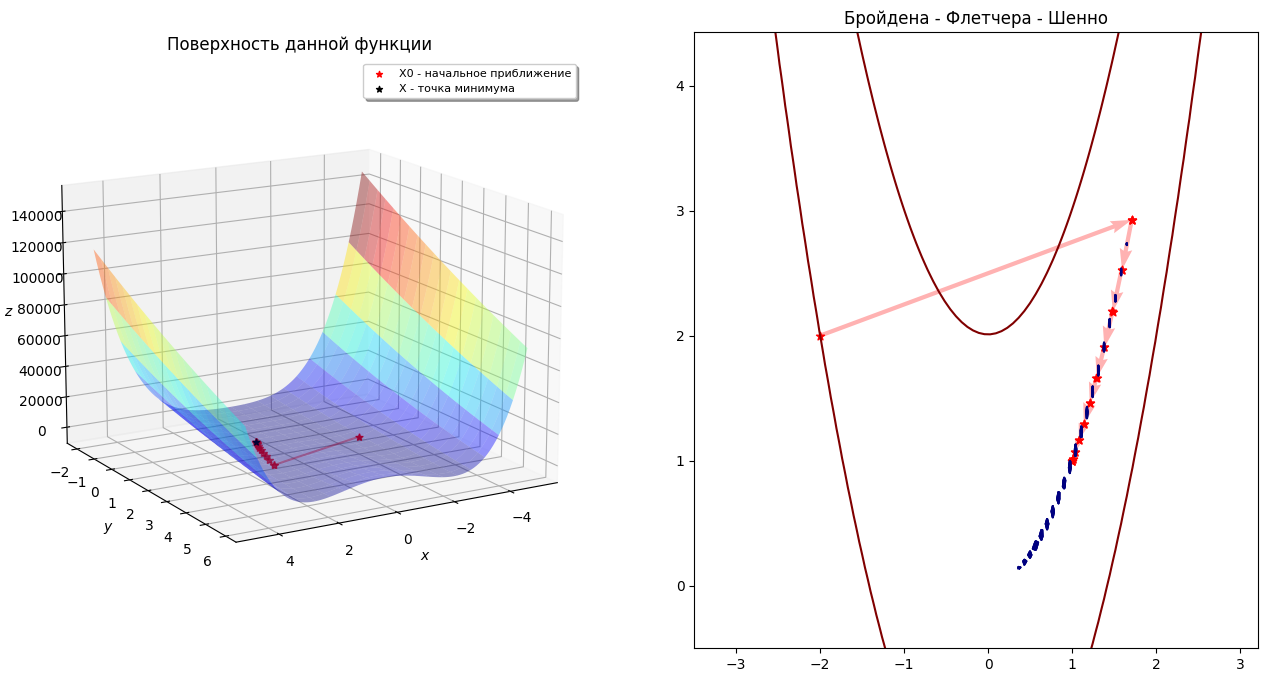

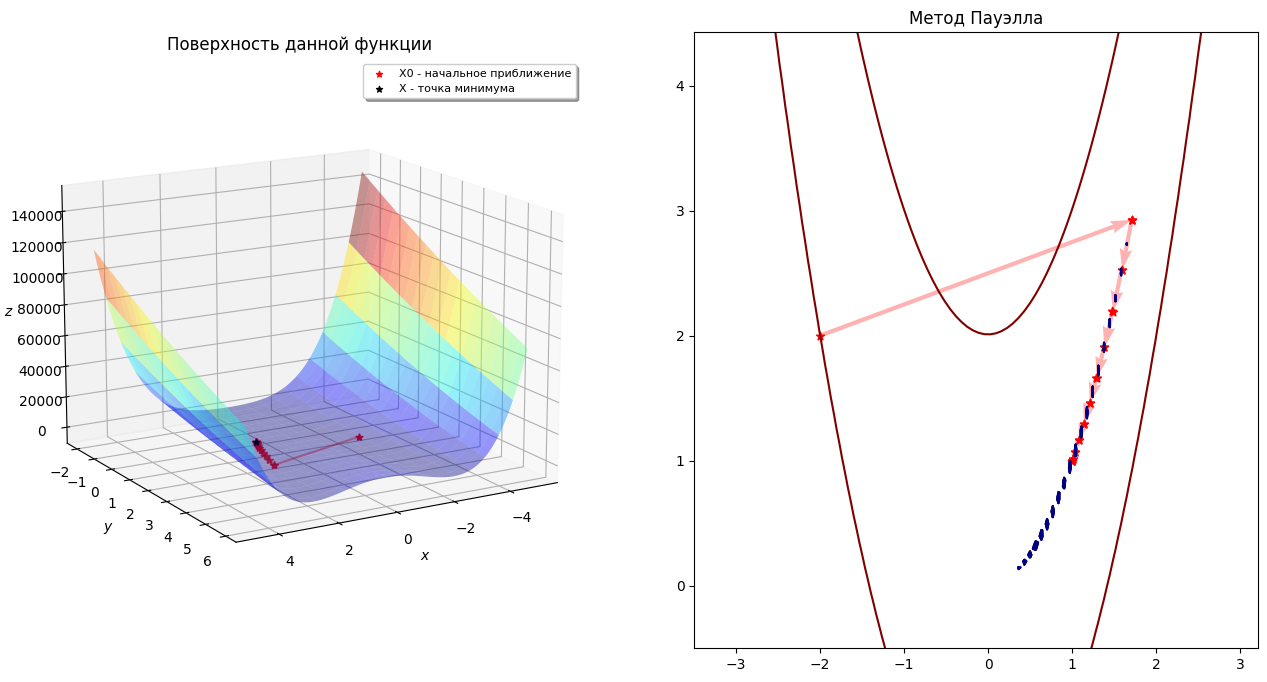

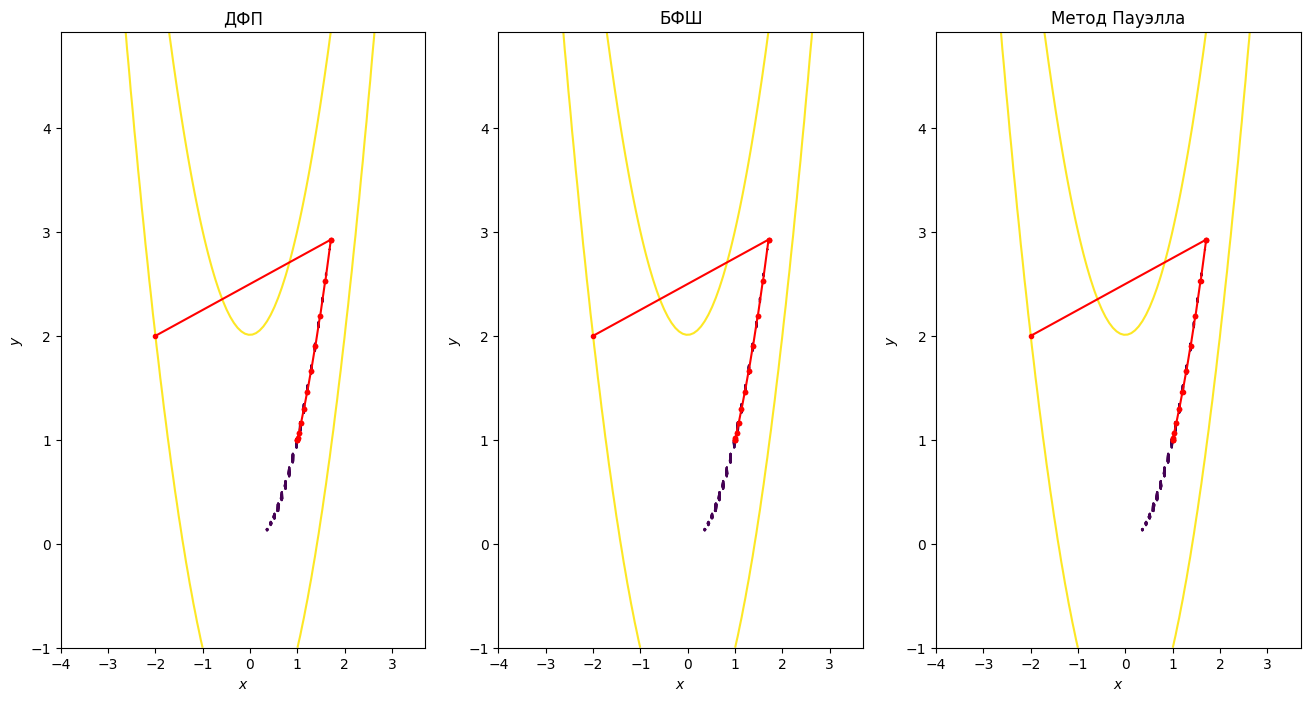

In [6]:
from ast import While
from cmath import sqrt
from matplotlib.colors import LinearSegmentedColormap
from sympy.tensor.array import derive_by_array
from scipy import optimize
from operator import mod
import numpy as np
import sympy as sp
import math

import matplotlib.pyplot as plt


# Параметры методов:
alpha = 200
eps = 0.000001
X0 = np.array([-2, 2])

# Функция Розенброка
def f(x, y): return alpha * (x**2-y)**2 + (x - 1)**2


# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
Grad_f = derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')

# Вычисление гессиана
Hessian_f = derive_by_array(derive_by_array(
    f(x_sym, y_sym), [x_sym, y_sym]), [x_sym, y_sym])
Hessian_f = sp.lambdify((x_sym, y_sym), Hessian_f, 'numpy')


def DFP():
    def w(X): return -np.array(Grad_f(X[0], X[1]))
    def fun(X): return f(X[0], X[1])
    A_p, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)

    X = X0
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    p = w(X)
    g = 1
    n = i = 0
    A = np.eye(2)
    A_p = np.append(A_p, A)

    while np.linalg.norm(w(X)) > eps:
        # минимизируем функцию
        def phi(kappa): return fun(X + kappa * p)
        kappa, arg, k = optimize.golden(phi, full_output=True)
        n += k
        
        # находим точку
        Xk = X + kappa * p
        X_p = np.append(X_p, Xk[0])
        Y_p = np.append(Y_p, Xk[1])

        deltaWk = w(Xk) - w(X)
        deltaXk = Xk - X
        i += 1
        g += 1
        if i % 2 == 0:
            A = np.eye(2)
        else:
            ro = np.dot(np.dot(A, deltaWk), deltaWk)
            part1 = np.outer(deltaXk, deltaXk) / \
                np.dot(deltaWk, deltaXk)
            part2 = np.dot(np.outer(np.dot(A, deltaWk), np.transpose(deltaWk)),
                           np.transpose(A)) / ro
            A = A - part1 - part2
        X = Xk
        p = np.dot(A, w(X))
        A_p = np.append(A_p, A)
    return X, X_p, Y_p, A_p, i, n, g


def BFSH():
    def w(X): return -np.array(Grad_f(X[0], X[1]))
    def fun(X): return f(X[0], X[1])
    A_p, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)

    X = X0
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    p = w(X)
    g = 1
    n = i = 0
    A = np.eye(2)
    A_p = np.append(A_p, A)

    while np.linalg.norm(w(X)) > eps:
        # минимизируем функцию
        def phi(kappa): return fun(X + kappa * p)
        kappa, arg, k = optimize.golden(phi, full_output=True)
        n += k
        
        # находим точку
        Xk = X + kappa * p
        X_p = np.append(X_p, Xk[0])
        Y_p = np.append(Y_p, Xk[1])

        deltaWk = w(Xk) - w(X)
        deltaXk = Xk - X
        i += 1
        g += 1
        if i % 2 == 0:
            A = np.eye(2)
        else:
            ro = np.dot(np.dot(A, deltaWk), deltaWk)
            r = np.dot(A, deltaWk) / ro - deltaXk / np.dot(deltaXk, deltaWk)
            part1 = np.outer(deltaXk, deltaXk) / \
                np.dot(deltaWk, deltaXk)
            part2 = np.dot(np.outer(np.dot(A, deltaWk), np.transpose(deltaWk)),
                           np.transpose(A)) / ro
            part3 = ro * np.outer(r, np.transpose(r))
            A = A - part1 - part2 + part3
        X = Xk
        p = np.dot(A, w(X))
        A_p = np.append(A_p, A)
    return X, X_p, Y_p, A_p, i, n, g


def Powel():
    def w(X): return -np.array(Grad_f(X[0], X[1]))
    def fun(X): return f(X[0], X[1])
    A_p, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)

    X = X0
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    p = w(X)
    g = 1
    n = i = 0
    A = np.eye(2)
    A_p = np.append(A_p, A)

    while np.linalg.norm(w(X)) > eps:
        # минимизируем функцию
        def phi(kappa): return fun(X + kappa * p)
        kappa, arg, k = optimize.golden(phi, full_output=True)
        n += k
        
        # находим точку
        Xk = X + kappa * p
        X_p = np.append(X_p, Xk[0])
        Y_p = np.append(Y_p, Xk[1])

        deltaWk = w(Xk) - w(X)
        deltaXk = Xk - X
        deltaXk_wave = deltaXk + np.dot(A, deltaWk)
        i += 1
        g += 1
        if i % 2 == 0:
            A = np.eye(2)
        else:
            q = np.outer(deltaXk_wave, np.transpose(deltaXk_wave)) / \
            np.dot(deltaWk, deltaXk_wave)
            A = A - q
        X = Xk
        p = np.dot(A, w(X))
        A_p = np.append(A_p, A)
    return X, X_p, Y_p, A_p, i, n, g
    

# 3D и линии уровня двух графиков
def DrawSurfContour(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize=(16, 8))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    fig.canvas.manager.set_window_title('Квазиньютоновские методы')

    delta = 2
    X = np.linspace(np.min(X2_p) - delta, np.max(X2_p) + delta,  100)
    Y = np.linspace(np.min(Y2_p) - delta, np.max(Y2_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels=Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('ДФП')

    delta = 2
    X = np.linspace(np.min(X3_p) - delta, np.max(X3_p) + delta,  100)
    Y = np.linspace(np.min(Y3_p) - delta, np.max(Y3_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels=Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('БФШ')

    delta = 2
    X = np.linspace(np.min(X4_p) - delta, np.max(X4_p) + delta,  100)
    Y = np.linspace(np.min(Y4_p) - delta, np.max(Y4_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels=Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Пауэлла')


# 3D и линии уровня одного графика
def Draw(X_, X_p, Y_p, k):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1]))
    X = np.linspace(np.min(X_p) - delta, np.max(X_p) + delta,  100)
    Y = np.linspace(np.min(Y_p) - delta, np.max(Y_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)


    # Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize=(16, 8))

    # Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=5, cstride=5,
                    cmap='jet', alpha=.4, edgecolor='none')
    ax.plot(X_p, Y_p, f(X_p, Y_p), color='r', marker='*', alpha=.4)

    # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*',
               c='red', label='X0 - начальное приближение')
    ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*',
               c='black', label='X - точка минимума')
    ax.legend(shadow=True, fontsize=8)
    ax.view_init(15, 60)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title('Поверхность данной функции')


 
    delta = 1.5
    X = np.linspace(np.min(X_p) - delta, np.max(X_p) + delta,  100)
    Y = np.linspace(np.min(Y_p) - delta, np.max(Y_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    # Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X, Y, Z, levels=Val(X_p, Y_p), cmap='jet')

    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color='r', marker='*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy,
              scale_units='xy', angles='xy', scale=1, color='r', alpha=.3)
    if k == 1:
        fig.canvas.manager.set_window_title('Давидона - Флетчера - Пауэлла')
        ax.set_title('Давидона - Флетчера - Пауэлла')
    elif k == 2:
        fig.canvas.manager.set_window_title('Бройдена - Флетчера - Шенно')
        ax.set_title('Бройдена - Флетчера - Шенно')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Пауэлла')
        ax.set_title('Метод Пауэлла')

# Таблица точек и значений
def DrawPoints(X_p, Y_p):
    for x in range(len(X_p)):
        print('X = [', '%.6f' % X_p[x], ' ', '%.6f' %
              Y_p[x], ']', '\tf = ', '%.6f' % f(X_p[x], Y_p[x]))


def DrawA(A_p):
    x = 0
    while x < len(A_p):
        print(A_p[x], ' ', A_p[x + 1])
        print(A_p[x + 2], ' ', A_p[x + 3])
        x += 4
    print()

# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i], Y_p[i]))
    return np.sort(Value)


##############################################################################################################################################################################
##############################################################################################################################################################################
##############################################################################################################################################################################


print(" " * 20, ' Методы второго порядка')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)

X1, X1_p, Y1_p, A1_p, i1, n1, g1 = DFP()
print('Точка минимума: ', X1)
print('Минимум: ', f(X1[0], X1[1]))
print('Количество итераций: ', i1)
print('Количество вызовов: ', n1)
print('Количество градиентов: ', g1)
#DrawPoints(X1_p, Y1_p)
Draw(X1, X1_p, Y1_p, 1)


X2, X2_p, Y2_p, A2_p, i2, n2, g2 = BFSH()
print('Точка минимума: ', X2)
print('Минимум: ', f(X2[0], X2[1]))
print('Количество итераций: ', i2)
print('Количество вызовов: ', n2)
#DrawPoints(X2_p, Y2_p)
Draw(X2, X2_p, Y2_p, 2)


X3, X3_p, Y3_p, A3_p, i3, n3, g3 = Powel()
print('Точка минимума: ', X3)
print('Минимум: ', f(X3[0], X3[1]))
print('Количество итераций: ', i3)
print('Количество вызовов: ', n3)
#DrawPoints(X3_p, Y3_p)
Draw(X3, X3_p, Y3_p, 3)



X1, X1_p, Y1_p, A1_p, i1, n1, g1 = DFP()
X2, X2_p, Y2_p, A2_p, i2, n2, g2 = BFSH()
X3, X3_p, Y3_p, A3_p, i3, n3, g3 = Powel()
# DrawPoints(X1_p, Y1_p)
# DrawPoints(X2_p, Y2_p)
# DrawPoints(X3_p, Y3_p)
print()
print('**********************************************************************************************************************************************************************')
print('Методы\t\t\t', '       ДФП\t\t\t', '     БФШ\t\t\t', '   Пауэлла')
print('Xmin  \t\t',  X1, '\t\t', X2, '\t', X3)
print('f(Xmin)\t\t\t', f(X1[0], X1[1]), '\t\t\t',
      f(X2[0], X2[1]), '\t\t', f(X3[0], X3[1]))
print('i\t\t\t', i1, '\t\t\t\t\t', i2, '\t\t\t\t\t', i3)
print('n\t\t\t', n1, '\t\t\t\t\t', n2, '\t\t\t\t\t', n3)
print('g\t\t\t', g1, '\t\t\t\t\t', g2, '\t\t\t\t\t', g3)

print('**********************************************************************************************************************************************************************')
DrawSurfContour(X1, X2, X3, X1_p, Y1_p, X2_p, Y2_p, X3_p, Y3_p)

plt.show()
